## NASA - Whistler Waves
Learning Objective: the purpose of the assignment is to derive feature engineering spectrograms of wave files

In [2]:
# Install needed dependencies
!pip3 install librosa
!pip3 install numba>=0.53

In [3]:
# Mount google drive for audio files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Import dependencies
import librosa
import numpy as np
import numpy as np
import scipy
import matplotlib.pyplot as plt
import librosa.display

# Load audio file
audio_data = "/content/drive/MyDrive/NASA audio files/whistler.wav"
y, sr = librosa.load(audio_data)
print(type(y), type(sr))
print(y.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(680996,) 22050


In [5]:
librosa.load(audio_data, sr=44100)

(array([0.0000000e+00, 1.5085531e-10, 3.9470605e-10, ..., 7.5010937e-03,
        1.6088143e-02, 1.5781028e-02], dtype=float32),
 44100)

In [6]:
# display audio file
import IPython.display as ipd
ipd.Audio(audio_data)

<ipython-input-7-c99b7c59af67>:4: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), x_axis='time', y_axis='log')


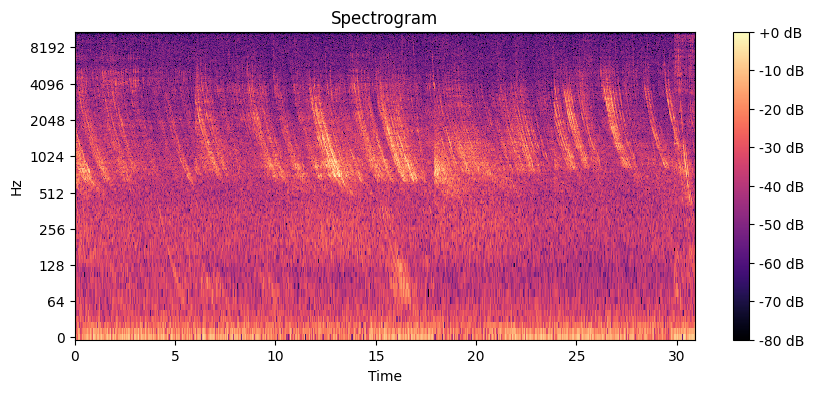

In [7]:
# Display spectrogram
plt.figure(figsize=(10, 4))
D = librosa.stft(y)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


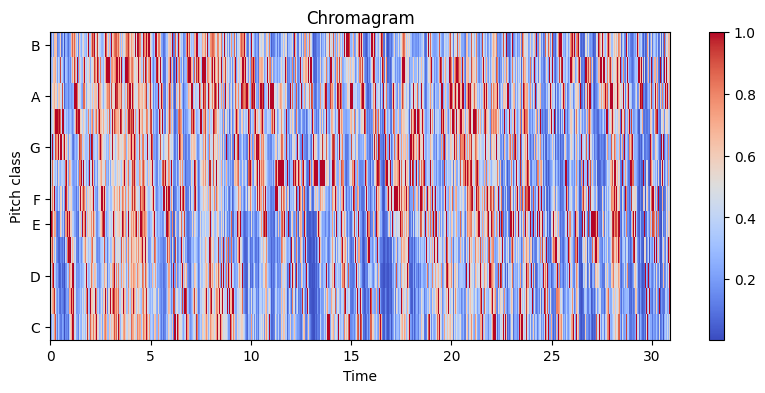

In [8]:
# Compute the chromagram from a waveform or STFT
chromagram = librosa.feature.chroma_stft(y=y, sr=sr)

plt.figure(figsize=(10, 4))
# Display the chromagram: the energy in each chromatic pitch class as a function of time
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title('Chromagram')
plt.show()


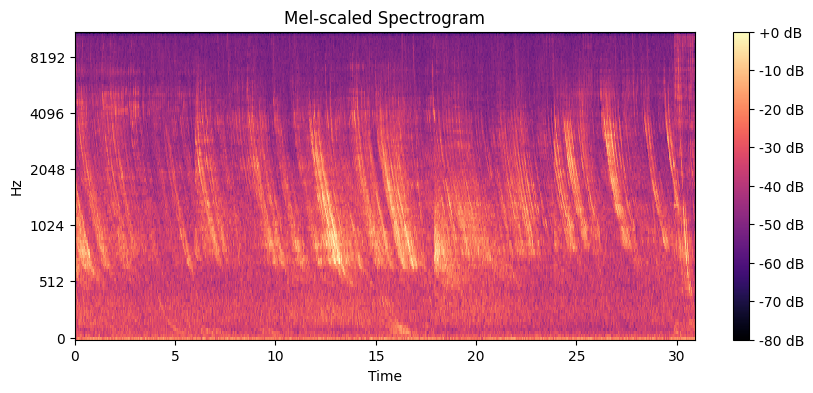

In [9]:
# Display mel-scaled spectrogram
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spect, ref=np.max), x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-scaled Spectrogram')
plt.show()


<ipython-input-10-c9f7455ba754>:4: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(stft_result, ref=np.max), x_axis='time', y_axis='log')


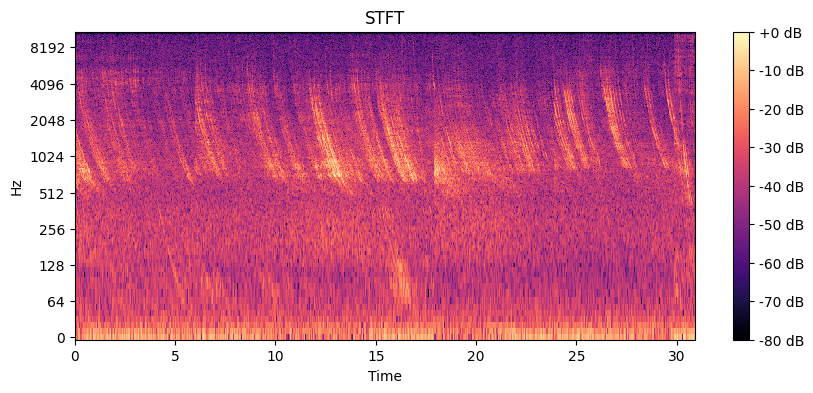

In [10]:
# Display STFT
stft_result = librosa.stft(y)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(stft_result, ref=np.max), x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT')
plt.show()


In [11]:
# Beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print(f"Tempo: {tempo}")
print(f"Beat frames: {beat_frames}")


Tempo: 143.5546875
Beat frames: [   3   22   40   59   77   94  111  128  147  166  184  203  221  239
  257  274  292  309  327  345  364  383  401  419  436  453  470  488
  505  522  540  558  576  594  614  633  651  668  685  703  721  738
  756  774  793  812  831  849  868  886  904  922  940  957  976  994
 1014 1031 1051 1071 1090 1108 1125 1143 1162 1180 1199 1218 1235 1252
 1270 1288]


<ipython-input-12-d5ac23b38dce>:4: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(cqt_result, ref=np.max), x_axis='time', y_axis='cqt_note')


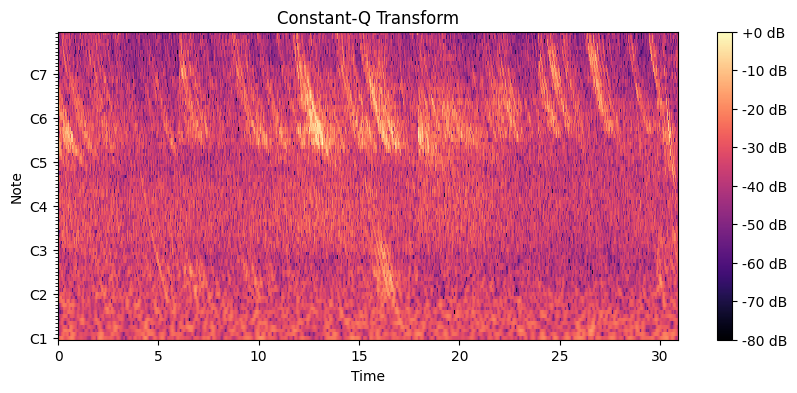

In [12]:
# Display CQT
cqt_result = librosa.cqt(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(cqt_result, ref=np.max), x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q Transform')
plt.show()
